In [1]:
import numpy as np; np.random.seed(1)
import pandas as pd
import json
import matplotlib.pyplot as plt


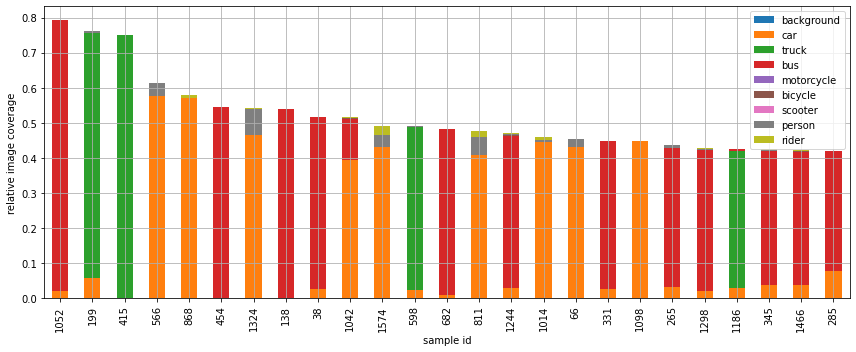

In [67]:
df = pd.read_json('bb_sizes.json')
df = df.sort_values('sum', ascending=False).drop(['sum'], axis=1)
ax = df[:25].plot(figsize=(12,5), kind='bar', stacked=True, grid=True)
ax.set_xlabel("sample id")
ax.set_ylabel("relative image coverage")
ax.legend(loc="upper right", ncol=1)
plt.tight_layout()
plt.savefig("top_25_bb_sizes.pdf")

In [6]:
with open('aspect_ratios.json') as f:
    aspect_ratios = json.load(f)

# print(len(aspect_ratios))

# common_aspect_ratios = []

# for height in range(1,71, 2):
#     for width in range(1,71, 2):
#         ratio = height / width
#         common_aspect_ratios.append((height/width, f"{height}/{width}"))

# common_aspect_ratios.sort(key=lambda x: x[0])

# def getClosestCommonAspectRatio(ar):
#     return min(common_aspect_ratios, key=lambda x:abs(x[0]-ar))[1]  

# closestCommonAspectRatios = {}
# for aspect_ratio in aspect_ratios:
#     closestCommonAspectRatios.setdefault(
#         getClosestCommonAspectRatio(aspect_ratio),
#         list()
#     ).append(aspect_ratio)

# closestCommonAspectRatios = [(k, len(v)) for k, v in closestCommonAspectRatios.items()]
# closestCommonAspectRatios.sort(key=lambda x: x[1])
print(closestCommonAspectRatios[-10:])

plt.figure(figsize=(16,9))

plt.bar(*zip(*closestCommonAspectRatios))


NameError: name 'json' is not defined

[(6.083712793039662, 131), (8.116935048670584, 132), (6.664633437505639, 143), (7.100323920855122, 147), (8.262165209787078, 147), (6.519403276389145, 155), (7.245554081971616, 155), (5.502792148573684, 166), (6.374173115272651, 185), (5.938482631923168, 199)]


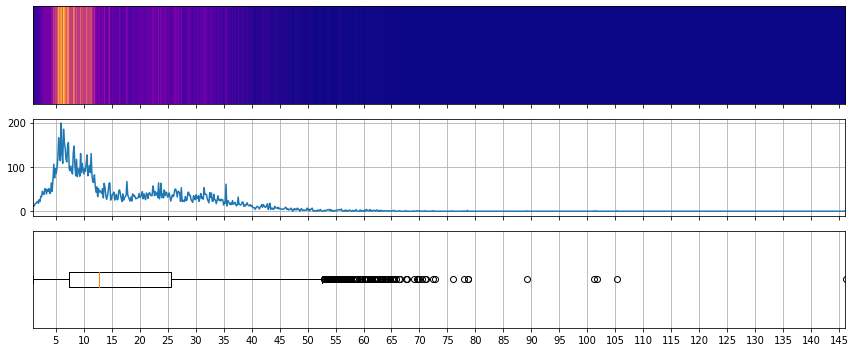

In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import json

with open('aspect_ratios.json') as f:
    dimensions = json.load(f)

aspect_ratios = []
for w, h in dimensions:
    if w > h:
        aspect_ratio = w / h
    else:
        aspect_ratio = h / w
    aspect_ratios.append(aspect_ratio)


y, x = np.histogram(aspect_ratios, bins=1000)
x = x[:-1]

combined = list(zip(x, y))
combined.sort(key=lambda x: x[1])
print(combined[-10:])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, figsize=(12, 5))
ax1.xaxis.set_major_locator(MultipleLocator(5))


extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax1.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent)
ax1.set_yticks([])
ax1.set_xlim(extent[0], extent[1])
ax1.xaxis.set_major_locator(MultipleLocator(5))

ax2.grid()
ax2.plot(x,y)

ax3.grid()
ax3.boxplot(aspect_ratios, vert=False)
ax3.set_yticks([])


plt.tight_layout()
plt.savefig('aspect_ratios.pdf')
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (9,) and arg 1 with shape (9, 2).

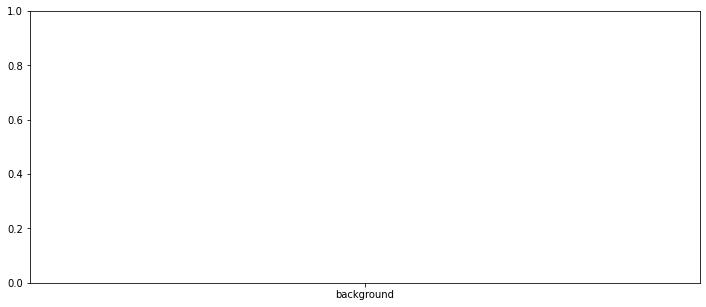

In [25]:
with open('total_class_counters.json') as f:
    data = json.load(f)
    
plt.figure(figsize=(12,5))
plt.bar(*zip(*data.items()))
plt.grid()
plt.tight_layout()
plt.savefig('total_class_counters.pdf')
plt.show()

len before thr=13322
len after thr=12205


<Figure size 432x288 with 0 Axes>

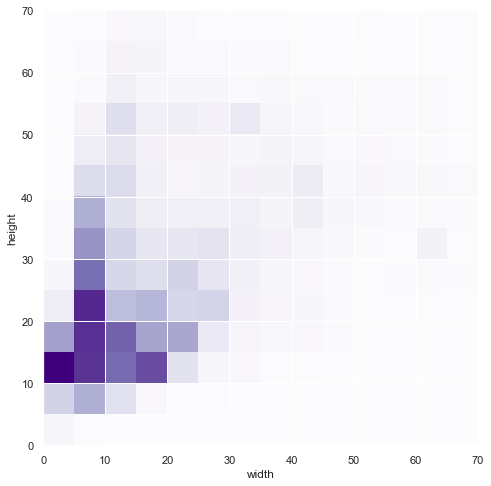

In [32]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()


with open('bb_dimensions.json') as f:
    bb_dimensions = json.load(f)

# sort out values larger than threshold
thr = 70
print(f"len before thr={len(bb_dimensions)}")
bb_dimensions = [(x, y) for x, y, _ in bb_dimensions if x <= thr and y <= thr]
print(f"len after thr={len(bb_dimensions)}")

# add artificial zero and threshold datapoints
bb_dimensions.append((0, 0))
bb_dimensions.append((thr, thr))

# unpack list of tuples into two lists
x = [x for x, _ in bb_dimensions]
y = [y for _, y in bb_dimensions]

bb_dimensions, xedges, yedges = np.histogram2d(x, y, bins=14)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.figure(figsize=(8,8))
plt.imshow(bb_dimensions.T, origin='lower', extent=extent, cmap="Purples")
plt.xlabel("width")
plt.ylabel("height")
plt.savefig("bb_dimensions_heatmap.pdf")

# dimension_analysis = []
# for i in range(bb_dimensions.shape[0]):
#     for j in range(bb_dimensions.shape[1]):
#         count = bb_dimensions[i][j]
#         if count == 0:
#             continue

#         w, h = 5 * i + 2.5, 5 * j + 2.5

#         if w > h:
#             min_size = h
#             aspect_ratio = w / h
#         else:
#             min_size = w
#             aspect_ratio = h / w

#         dimension_analysis.append((count, min_size, aspect_ratio, (w, h)))

# dimension_analysis.sort(key=lambda x: x[0], reverse=True)

# dict_for_dataframe = {
#     'count': [],
#     'shape': [],
#     'min_size': [],
#     'aspect_ratio': [],
# }

# #print(dimension_analysis[-5:])
# for count, min_size, aspect_ratio, (w, h) in dimension_analysis[:50]:
#     dict_for_dataframe['count'].append(count)
#     dict_for_dataframe['shape'].append(f"{w}x{h}")
#     dict_for_dataframe['min_size'].append(min_size)
#     dict_for_dataframe['aspect_ratio'].append(aspect_ratio)

# df = pd.DataFrame.from_dict(dict_for_dataframe)
# print(df.to_latex())


In [29]:
from sklearn.cluster import KMeans


with open('bb_dimensions.json') as f:
    bb_dimensions = json.load(f)

bb_dimensions = [[x, y] for x, y, _ in bb_dimensions]
kmeans = KMeans().fit(bb_dimensions)

kmeans.cluster_centers_

array([[ 27.57567867,  79.52413624],
       [ 14.11654642,  40.4855433 ],
       [301.6499956 ,  92.4774922 ],
       [ 41.54301152,  38.94556888],
       [159.2544874 ,  86.26226542],
       [ 90.21501272,  46.26296362],
       [ 11.84603305,  17.2211915 ],
       [506.68053894, 123.3115922 ]])